### 3. 분산과 표준편차

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
np.random.seed(2022)
x1 = np.random.random(100)
x2 = np.random.random(100)

In [4]:
np.var(x1), np.var(x2), np.var(x1+x2)

(0.10095043502831653, 0.09337115402673377, 0.2138607852049591)

In [5]:
# 연습 문제 7.3.3
np.random.seed(2022)
x1 = np.random.random(100)
x_means = np.zeros(50)
for i in range(50):
    x_means[i] = np.mean(np.random.random(100))

np.var(x1) / np.var(x_means)

134.99892312468896

### 4. 다변수 확률변수

- 결합확률 질량변수

In [6]:
grades = ["A", "B", "C", "D", "E", "F"]
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]], 
    columns=grades, index=grades)
scores.index.name = "Y"
scores.columns.name = "X"
scores

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [7]:
# 결합확률질량함수(joint probability mass function)
pmf = scores / scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


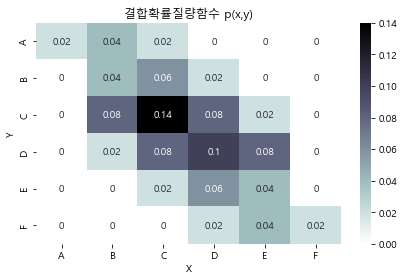

In [8]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()

### 5. 공분산과 상관계수

In [10]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x1, x3)   # 상관계수, 유의확률

(0.8717537758865832, 1.0386674194497525e-47)

In [12]:
# 연습 문제 7.5.1
# 1) 꽃받침의 길이와 꽃받침의 폭 사이의 상관계수
sp.stats.pearsonr(x1, x2)[0]

-0.11756978413300204

In [14]:
# 2) 꽃잎의 길이와 꽃잎의 폭 사이의 상관계수
sp.stats.pearsonr(x3, x4)[0]

0.962865431402796

In [15]:
# 3) 꽃받침의 폭과 꽃잎의 폭 사이의 상관계수
sp.stats.pearsonr(x2, x4)[0]

-0.3661259325364391

- 상관계수

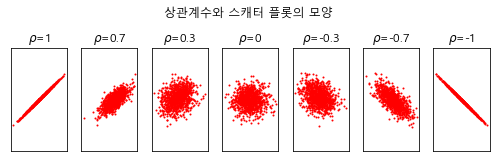

In [16]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

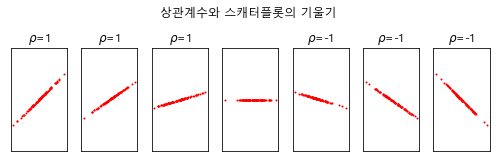

In [18]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스캐터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

- 비선형 상관관계

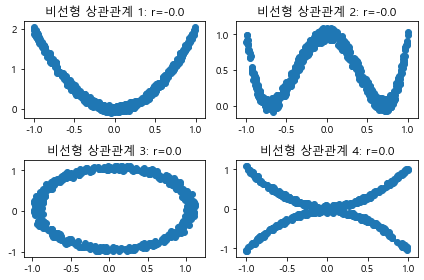

In [19]:
n = 500
np.random.seed(1)

plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))

plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))

plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))

plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))

plt.tight_layout()
plt.show()

In [20]:
# 연습 문제 7.5.4
# 붓꽃 데이터에서 4가지 확률변수의 표본공분산행렬을 구하라.
from sklearn.datasets import load_iris
iris = load_iris()
iris.data.shape

(150, 4)

In [22]:
np.dot(iris.data.T, iris.data) / 150

array([[34.82566667, 17.82286667, 23.22506667,  7.52093333],
       [17.82286667,  9.536     , 11.162     ,  3.54593333],
       [23.22506667, 11.162     , 17.21806667,  5.79406667],
       [ 7.52093333,  3.54593333,  5.79406667,  2.01553333]])

In [23]:
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)
np.dot(iris_std.T, iris_std) / (150 - 1)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])